In [4]:
from meteostat import Point, Stations, Daily
import pandas as pd
from datetime import datetime
import matplotlib.pyplot as plt
import seaborn as sns

from IPython.display import display

In [2]:
# Stations.cache_dir = 'data/'

stations = Stations()
stations_file = stations.region('US')
us_stations_df = stations_file.fetch()

In [12]:
display(us_stations_df)

,name,country,region,wmo,icao,latitude,longitude,elevation,timezone,hourly_start,hourly_end,daily_start,daily_end,monthly_start,monthly_end
id,,,,,,,,,,,,,,,
69002,Hunter Ligget / Hunter-Liggett,US,CA,69002,KHGT,35.9935,-121.2367,310.0,America/Los_Angeles,1964-07-15,1997-04-01,1964-07-15,1971-07-31,1964-01-01,1971-01-01
69007,Fort Ord / Blanco,US,CA,69007,KOAR,36.6815,-121.7617,42.0,America/Los_Angeles,1973-01-02,2021-11-04,1983-03-31,2021-11-02,2020-01-01,2021-01-01
69014,Irvine,US,CA,69014,KNZJ,33.6667,-117.7167,119.0,America/Los_Angeles,1989-01-01,1999-06-06,1945-03-01,1998-12-10,1945-01-01,1998-01-01
69015,Twentynine Palms / Sunfair Heights,US,CA,69015,KNXP,34.2962,-116.1622,625.0,America/Los_Angeles,1990-01-02,2021-11-04,1945-05-01,2021-11-01,1945-01-01,2021-01-01
69019,Abilene / Tye,US,TX,69019,KDYS,32.4198,-99.8554,545.0,America/Chicago,1943-12-01,2021-11-04,1943-12-02,2021-11-01,1944-01-01,1996-01-01
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
PHKO0,Kailua Kona / Mahaiula,US,HI,<NA>,PHKO,19.7388,-156.0456,14.0,Pacific/Honolulu,2006-01-01,2021-11-04,2006-01-01,2021-11-01,2006-01-01,2021-01-01
PHMU0,Kamuela / Puopelu,US,HI,<NA>,PHMU,20.0013,-155.6681,814.0,Pacific/Honolulu,1941-07-14,2021-06-10,NaT,NaT,NaT,NaT
PHNY0,Lanai Airport 656 / Kaumalapau,US,HI,<NA>,PHNY,20.7856,-156.9514,399.0,Pacific/Honolulu,2006-01-01,2021-11-04,2006-01-04,2021-11-02,2008-01-01,2021-01-01


In [21]:
us_stations_df['region'].unique()

<StringArray>
['CA', 'TX', 'WA', 'OR', 'AR', 'FL', 'MS', 'VA', 'AK', 'NV', 'AZ', 'IL', 'WV',
 'MI', 'GA', 'SC', 'AL', 'LA', 'NM', 'NC', 'TN', 'MO', 'OK', 'MD', 'PA', 'DC',
 'NJ', 'KY', 'DE', 'OH', 'IN', 'KS', 'CO', 'UT', 'NY', 'CT', 'MA', 'RI', 'VT',
 'IA', 'NE', 'WY', 'ID', 'NH', 'ME', 'WI', 'MN', 'SD', 'MT', 'ND', <NA>, 'HI',
 'RO', 'SA', 'TI', 'WQ']
Length: 56, dtype: string

In [22]:
display(us_stations_df[us_stations_df['region'] == 'NJ'])


,name,country,region,wmo,icao,latitude,longitude,elevation,timezone,hourly_start,hourly_end,daily_start,daily_end,monthly_start,monthly_end
id,,,,,,,,,,,,,,,
72407,Atlantic City International,US,NJ,72407,KACY,39.4667,-74.0833,23.0,America/New_York,1947-01-01,2021-11-04,1947-01-01,2021-11-01,1947-01-01,2021-01-01
72409,Lakehurst Naval Air Station,US,NJ,72409,KNEL,40.0333,-74.3167,31.0,America/New_York,1973-01-01,2021-11-04,1973-01-01,2021-11-01,2010-01-01,2021-01-01
72502,Newark Airport,US,NJ,72502,KEWR,40.6833,-74.0000,5.0,America/New_York,1973-01-01,2021-11-04,1893-01-01,2021-11-01,1893-01-01,2021-01-01
74000,Lewisburg,US,NJ,74000,KFWN,41.2000,-74.6200,128.0,America/New_York,2006-01-01,2021-11-04,2006-01-01,2021-11-01,2006-01-01,2021-01-01
74590,Barnegat Coast Guard Station,US,NJ,74590,KN78,39.7667,-74.1000,6.0,America/New_York,NaT,NaT,2004-03-05,2021-11-01,2004-01-01,2021-01-01
K12N0,Andover / Wawayanda,US,NJ,<NA>,K12N,41.0086,-74.7380,178.0,America/New_York,2006-01-01,2021-09-23,2006-01-01,2021-09-22,2006-01-01,2021-01-01
KBLM0,Belmar / Carmerville,US,NJ,<NA>,KBLM,40.1868,-74.1246,47.0,America/New_York,1983-04-21,2021-11-04,1992-04-17,2021-11-02,2020-01-01,2021-01-01
KCDW0,Caldwell / Fairfield,US,NJ,<NA>,KCDW,40.8752,-74.2814,52.0,America/New_York,2006-01-01,2021-11-04,2006-01-01,2021-11-01,2006-01-01,2021-01-01
KLDJ0,Linden,US,NJ,<NA>,KLDJ,40.6174,-74.2446,7.0,America/New_York,2017-01-01,2021-11-04,2017-01-01,2021-11-02,2020-01-01,2021-01-01


In [23]:
display(us_stations_df[us_stations_df['name'] == 'Newark Airport'])

,name,country,region,wmo,icao,latitude,longitude,elevation,timezone,hourly_start,hourly_end,daily_start,daily_end,monthly_start,monthly_end
id,,,,,,,,,,,,,,,
72502,Newark Airport,US,NJ,72502,KEWR,40.6833,-74.0,5.0,America/New_York,1973-01-01,2021-11-04,1893-01-01,2021-11-01,1893-01-01,2021-01-01


In [10]:
us_stations_df.to_csv('data/us_weather_stations.csv')

In [3]:
stations = Stations()
start = datetime(2012, 10, 15)
end = datetime(2012, 10, 31)
point_newark = Point(40.6833, -74.0, 18)

data = Daily(point_newark, start, end) 
data = data.fetch()

data.to_csv('data/test_newark.csv')

In [ ]:
# Code	Meaning
# TEMP	Air Temperature
# TAVG	Average Temperature
# TMIN	Minimum Temperature
# TMAX	Maximum Temperature
# DWPT	Dew Point
# PRCP	Total Precipitation
# WDIR	Wind Direction
# WSPD	Average Wind Speed
# WPGT	Wind Peak Gust
# RHUM	Relative Humidity
# PRES	Sea-Level Air Pressure
# SNOW	Snow Depth
# TSUN	Total Sunshine Duration
# COCO	Weather Condition Code
# #

In [20]:
data = pd.read_csv('data/test_newark.csv')
display(data)

,time,tavg,tmin,tmax,prcp,snow,wdir,wspd,wpgt,pres,tsun
0,2012-10-15,18.5,14.9,22.1,8.4,0.0,210.1,16.6,NaN,NaN,NaN
1,2012-10-16,13.1,8.8,16.0,0.0,0.0,312.8,18.0,NaN,1008.5,NaN
2,2012-10-17,11.7,5.5,18.2,0.0,0.0,NaN,4.7,NaN,1014.7,NaN
3,2012-10-18,13.8,6.6,18.8,0.3,0.0,NaN,11.2,NaN,1015.8,NaN
4,2012-10-19,18.5,17.7,20.5,22.1,0.0,144.5,12.6,NaN,1009.2,NaN
5,2012-10-20,16.9,9.9,22.1,0.0,0.0,228.8,11.5,NaN,NaN,NaN
6,2012-10-21,14.1,9.3,20.5,0.0,0.0,271.3,16.6,NaN,1014.0,NaN
7,2012-10-22,15.3,9.3,21.6,0.0,0.0,295.5,12.2,NaN,1017.8,NaN
8,2012-10-23,14.4,9.3,18.2,0.8,0.0,NaN,6.8,NaN,1018.9,NaN
9,2012-10-24,14.7,13.2,16.6,1.5,0.0,34.7,9.4,NaN,1020.1,NaN


In [19]:
#data = data.reset_index()
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17 entries, 0 to 16
Data columns (total 11 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   time    17 non-null     object 
 1   tavg    17 non-null     float64
 2   tmin    17 non-null     float64
 3   tmax    17 non-null     float64
 4   prcp    17 non-null     float64
 5   snow    17 non-null     float64
 6   wdir    11 non-null     float64
 7   wspd    17 non-null     float64
 8   wpgt    0 non-null      float64
 9   pres    12 non-null     float64
 10  tsun    0 non-null      float64
dtypes: float64(10), object(1)
memory usage: 1.6+ KB


Index(['tavg', 'tmin', 'tmax', 'prcp', 'snow', 'wdir', 'wspd', 'wpgt', 'pres',
       'tsun'],
      dtype='object')

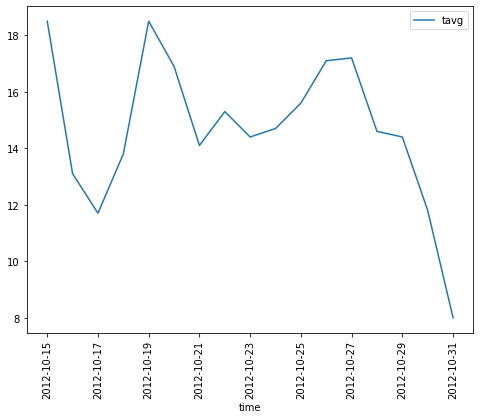

In [29]:
day_list = [day[0].lstrip('2012-') for day in data['time']]
data.plot(kind='line', x='time', y='tavg', figsize=(8,6), rot=90)

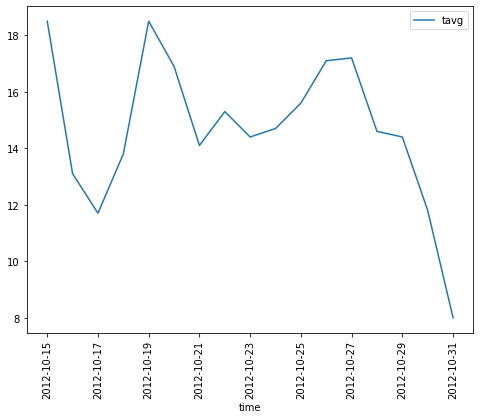

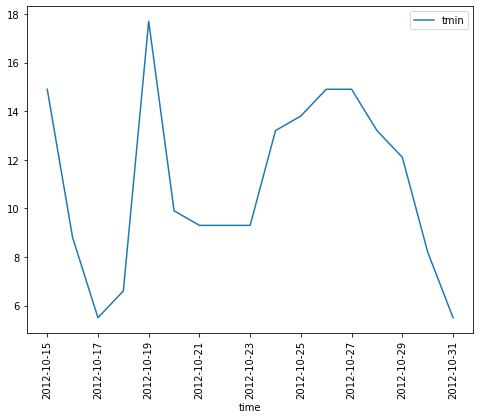

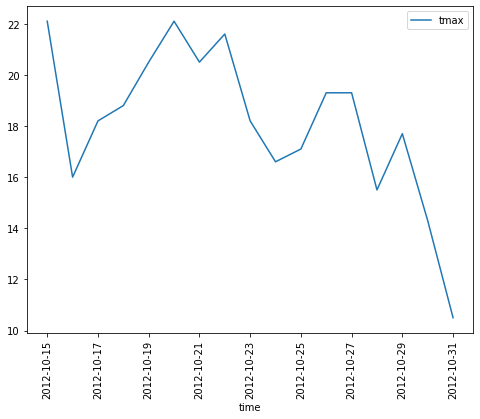

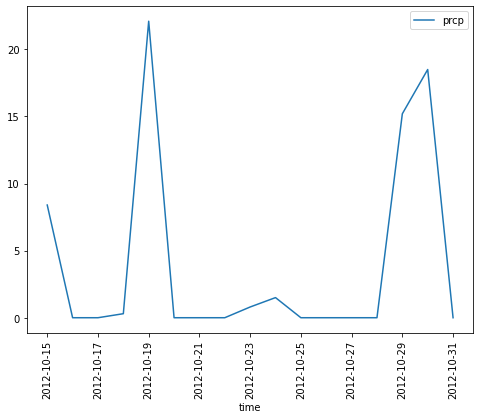

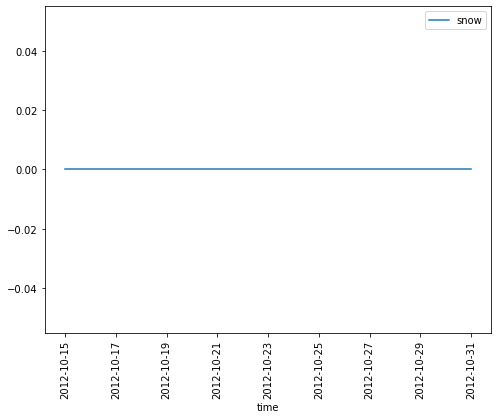

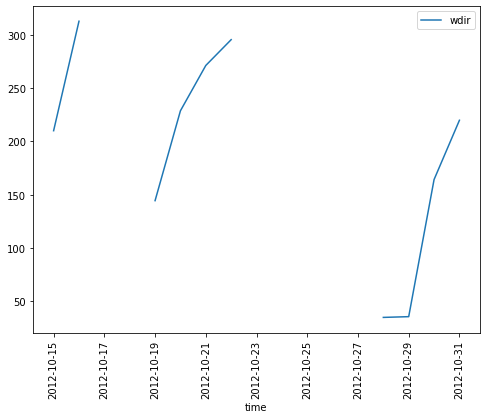

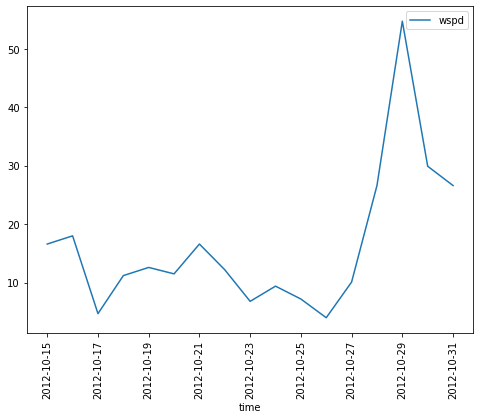

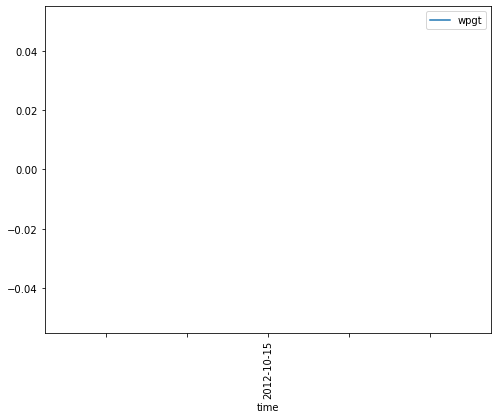

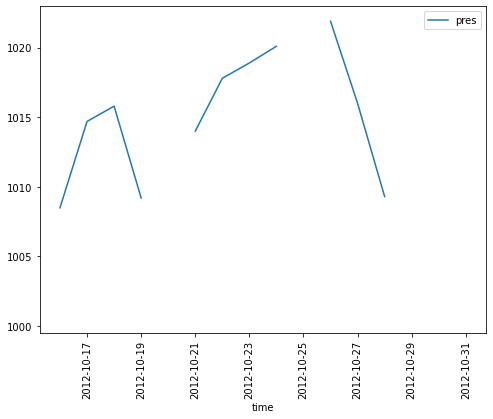

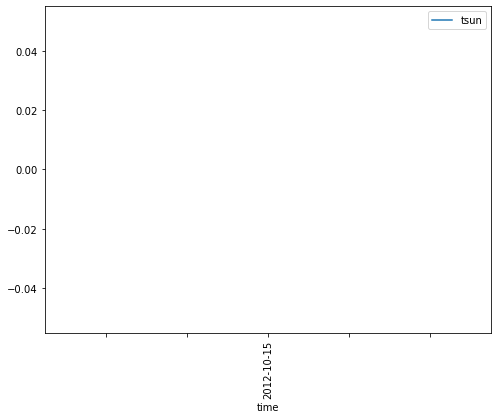

In [30]:
column_list = data.columns
for col in column_list[1:]:
    data.plot(kind='line', x='time', y=col, figsize=(8,6), rot=90)

In [ ]:
# good to work with temperature and windspee
# maybe perspiration